## Table of Contents

### 1. Importing libraries
### 2. Importing data
### 3. Fix missing values in order frequency flag
### 4. Fix price outliers
### 5. Fix avg_price and spending_flag columns
### 6. Export data set

# 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [2]:
# Create path shortcut
path = r'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/Instacart Basket Analysis'

In [3]:
# Check output
path

'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/Instacart Basket Analysis'

In [4]:
# Import orders_products_merged_grouped.pkl
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_grouped.pkl'))

In [5]:
# Check output
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [6]:
# Change options to display all columns
pd.options.display.max_columns = None

In [7]:
# Check output
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [8]:
# Check shape
ords_prods_merge.shape

(32404859, 24)

# 03. Fix missing values in order frequency flag

In [9]:
# Find missing values in order_frequency_flag
ords_prods_merge[ords_prods_merge['order_frequency_flag'].isnull()]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
13645692,895835,159838,1,0,17,NaN,10749,3,0,Organic Red Bell Pepper,83,4,5.7,both,Mid-range product,Busiest day,Busiest days,Most orders,1,New customer,7.42,Low spender,NaN,NaN
17251990,895835,159838,1,0,17,NaN,33401,6,0,Goat Cheese Crumbles,21,16,14.8,both,Mid-range product,Busiest day,Busiest days,Most orders,1,New customer,7.42,Low spender,NaN,NaN
17622767,895835,159838,1,0,17,NaN,23695,2,0,California Veggie Burger,42,1,4.7,both,Low-range product,Busiest day,Busiest days,Most orders,1,New customer,7.42,Low spender,NaN,NaN
24138593,895835,159838,1,0,17,NaN,21334,5,0,Organic Peeled Garlic,123,4,10.2,both,Mid-range product,Busiest day,Busiest days,Most orders,1,New customer,7.42,Low spender,NaN,NaN
25880002,895835,159838,1,0,17,NaN,22198,1,0,4X Ultra Concentrated Natural Laundry Detergen...,75,17,1.7,both,Low-range product,Busiest day,Busiest days,Most orders,1,New customer,7.42,Low spender,NaN,NaN


Since this user ordered from Instacart once and then never ordered again, the following columns are showing missing values: days_since_prior_order, median_days_since_prior_order, and order_frequency_flag. I think it's safe to flag this user as a 'Non-frequent customer' in the order_frequency_flag column.

In [10]:
# Create order frequency flag for one-time users as non-frequent customers
ords_prods_merge.loc[ords_prods_merge['median_days_since_prior_order'].isnull(), 'order_frequency_flag'] = 'Non-frequent customer'

In [11]:
# Check frequency of order_frequency_flag
ords_prods_merge['order_frequency_flag'].value_counts(dropna = False)

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636442
Name: order_frequency_flag, dtype: int64

In [12]:
# Check that order frequency flag was assigned correctly
ords_prods_merge[ords_prods_merge['median_days_since_prior_order'].isnull()]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
13645692,895835,159838,1,0,17,NaN,10749,3,0,Organic Red Bell Pepper,83,4,5.7,both,Mid-range product,Busiest day,Busiest days,Most orders,1,New customer,7.42,Low spender,NaN,Non-frequent customer
17251990,895835,159838,1,0,17,NaN,33401,6,0,Goat Cheese Crumbles,21,16,14.8,both,Mid-range product,Busiest day,Busiest days,Most orders,1,New customer,7.42,Low spender,NaN,Non-frequent customer
17622767,895835,159838,1,0,17,NaN,23695,2,0,California Veggie Burger,42,1,4.7,both,Low-range product,Busiest day,Busiest days,Most orders,1,New customer,7.42,Low spender,NaN,Non-frequent customer
24138593,895835,159838,1,0,17,NaN,21334,5,0,Organic Peeled Garlic,123,4,10.2,both,Mid-range product,Busiest day,Busiest days,Most orders,1,New customer,7.42,Low spender,NaN,Non-frequent customer
25880002,895835,159838,1,0,17,NaN,22198,1,0,4X Ultra Concentrated Natural Laundry Detergen...,75,17,1.7,both,Low-range product,Busiest day,Busiest days,Most orders,1,New customer,7.42,Low spender,NaN,Non-frequent customer


# 04. Fix price outliers

In [13]:
# Check stats for prices
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
# Check average of prices
ords_prods_merge['prices'].mean()

11.980225638467232

In [15]:
# Check median of prices
ords_prods_merge['prices'].median()

7.4

In [16]:
# Check max value of prices
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

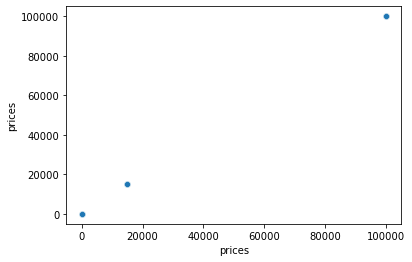

In [17]:
# Create scatterplot of prices against itself to identify outliers
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [18]:
# Check for outliers in prices
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [19]:
# Turn outlier values into NaN
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [20]:
# Check new max value of prices column
ords_prods_merge['prices'].max()

25.0

In [21]:
# Check one of the high price rows
ords_prods_merge.loc[10030345:10030350]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
10030350,2856927,618,2,5,12,30.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,NaN,both,High-range product,Regularly busy,Regularly busy,Most orders,27,Regular customer,70.721444,High spender,10.0,Frequent customer


# 05. Fix avg_price and spending_flag columns

In [23]:
# Look at aggregate max, min, and mean variables of avg_price
ords_prods_merge.agg({'avg_price': ['max', 'min', 'mean']})

,avg_price
max,25005.425000
min,1.000000
mean,11.980226


In [24]:
# Search for customers with high avg_price
ords_prods_merge.loc[ords_prods_merge['avg_price'] > 10000]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
1610544,399935,35869,1,4,7,NaN,24852,3,0,Banana,24,4,12.3,both,Mid-range product,Least busy,Least busy days,Average orders,4,New customer,12506.925000,High spender,25.5,Non-frequent customer
1610545,3362087,35869,3,0,9,21.0,24852,1,1,Banana,24,4,12.3,both,Mid-range product,Busiest day,Busiest days,Most orders,4,New customer,12506.925000,High spender,25.5,Non-frequent customer
4153949,2889952,199196,2,5,8,30.0,25146,6,0,Original Orange Juice,31,7,8.4,both,Mid-range product,Regularly busy,Regularly busy,Average orders,4,New customer,10721.342857,High spender,21.0,Non-frequent customer
5123086,1481766,74167,3,6,8,16.0,31683,4,0,Original No Pulp 100% Florida Orange Juice,31,7,1.8,both,Low-range product,Regularly busy,Regularly busy,Average orders,6,New customer,10209.987755,High spender,15.0,Regular customer
6839082,2889952,199196,2,5,8,30.0,41844,1,0,Honey Nut Cheerios,121,14,11.7,both,Mid-range product,Regularly busy,Regularly busy,Average orders,4,New customer,10721.342857,High spender,21.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31686900,434639,188803,7,0,10,2.0,18516,1,0,Center Cut Thick Sliced Bacon,106,12,12.4,both,Mid-range product,Busiest day,Busiest days,Most orders,10,New customer,15006.940000,High spender,11.0,Regular customer
31975552,2811957,139732,10,4,16,6.0,26928,1,0,Two-Bite Brownies,8,3,10.8,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,14042.512281,High spender,6.0,Frequent customer
32323808,2747297,199196,3,4,15,20.0,5839,5,0,Honey Chipotle Beef Jerky,23,19,1.8,both,Low-range product,Least busy,Least busy days,Most orders,4,New customer,10721.342857,High spender,21.0,Non-frequent customer
32359389,2747297,199196,3,4,15,20.0,1566,8,0,Forty Spices Hummus,67,20,4.9,both,Low-range product,Least busy,Least busy days,Most orders,4,New customer,10721.342857,High spender,21.0,Non-frequent customer


In [26]:
# Look at one user id with large avg_price
ords_prods_merge.loc[ords_prods_merge['user_id'] == 74167]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
5123086,1481766,74167,3,6,8,16.0,31683,4,0,Original No Pulp 100% Florida Orange Juice,31,7,1.8,both,Low-range product,Regularly busy,Regularly busy,Average orders,6,New customer,10209.987755,High spender,15.0,Regular customer
9147013,3119874,74167,1,3,12,NaN,41351,4,0,Family Size Naturally Flavored Whole Grain Oat...,121,14,1.0,both,Low-range product,Regularly busy,Least busy days,Most orders,6,New customer,10209.987755,High spender,15.0,Regular customer
9498628,3119874,74167,1,3,12,NaN,13966,7,0,Chicken Pot Pie,38,1,10.7,both,Mid-range product,Regularly busy,Least busy days,Most orders,6,New customer,10209.987755,High spender,15.0,Regular customer
9498629,1481766,74167,3,6,8,16.0,13966,7,1,Chicken Pot Pie,38,1,10.7,both,Mid-range product,Regularly busy,Regularly busy,Average orders,6,New customer,10209.987755,High spender,15.0,Regular customer
9498630,1178045,74167,6,1,11,30.0,13966,1,1,Chicken Pot Pie,38,1,10.7,both,Mid-range product,Regularly busy,Busiest days,Most orders,6,New customer,10209.987755,High spender,15.0,Regular customer
10059852,593590,74167,2,4,7,15.0,19468,7,0,Classic Yellow Mustard,72,13,14.1,both,Mid-range product,Least busy,Least busy days,Average orders,6,New customer,10209.987755,High spender,15.0,Regular customer
10081143,593590,74167,2,4,7,15.0,44234,12,0,Squeeze Tomato Ketchup,72,13,6.8,both,Mid-range product,Least busy,Least busy days,Average orders,6,New customer,10209.987755,High spender,15.0,Regular customer
10220071,2890695,74167,4,2,13,3.0,35123,4,0,Grilled & Ready Chicken Breast Strips,34,1,1.1,both,Low-range product,Regularly busy,Regularly busy,Most orders,6,New customer,10209.987755,High spender,15.0,Regular customer
10326769,593590,74167,2,4,7,15.0,9901,10,0,Original Strawberry Banana Yogurt,120,16,10.2,both,Mid-range product,Least busy,Least busy days,Average orders,6,New customer,10209.987755,High spender,15.0,Regular customer
10353933,593590,74167,2,4,7,15.0,22788,4,0,Singles American Cheese Slices,21,16,8.6,both,Mid-range product,Least busy,Least busy days,Average orders,6,New customer,10209.987755,High spender,15.0,Regular customer


In [27]:
# Fix avg_price column containing the average of the prices column, grouped by user_id
ords_prods_merge['avg_price'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)

In [28]:
# Check that previous user id with large avg_price has been updated
ords_prods_merge.loc[ords_prods_merge['user_id'] == 74167]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
5123086,1481766,74167,3,6,8,16.0,31683,4,0,Original No Pulp 100% Florida Orange Juice,31,7,1.8,both,Low-range product,Regularly busy,Regularly busy,Average orders,6,New customer,6.690909,High spender,15.0,Regular customer
9147013,3119874,74167,1,3,12,NaN,41351,4,0,Family Size Naturally Flavored Whole Grain Oat...,121,14,1.0,both,Low-range product,Regularly busy,Least busy days,Most orders,6,New customer,6.690909,High spender,15.0,Regular customer
9498628,3119874,74167,1,3,12,NaN,13966,7,0,Chicken Pot Pie,38,1,10.7,both,Mid-range product,Regularly busy,Least busy days,Most orders,6,New customer,6.690909,High spender,15.0,Regular customer
9498629,1481766,74167,3,6,8,16.0,13966,7,1,Chicken Pot Pie,38,1,10.7,both,Mid-range product,Regularly busy,Regularly busy,Average orders,6,New customer,6.690909,High spender,15.0,Regular customer
9498630,1178045,74167,6,1,11,30.0,13966,1,1,Chicken Pot Pie,38,1,10.7,both,Mid-range product,Regularly busy,Busiest days,Most orders,6,New customer,6.690909,High spender,15.0,Regular customer
10059852,593590,74167,2,4,7,15.0,19468,7,0,Classic Yellow Mustard,72,13,14.1,both,Mid-range product,Least busy,Least busy days,Average orders,6,New customer,6.690909,High spender,15.0,Regular customer
10081143,593590,74167,2,4,7,15.0,44234,12,0,Squeeze Tomato Ketchup,72,13,6.8,both,Mid-range product,Least busy,Least busy days,Average orders,6,New customer,6.690909,High spender,15.0,Regular customer
10220071,2890695,74167,4,2,13,3.0,35123,4,0,Grilled & Ready Chicken Breast Strips,34,1,1.1,both,Low-range product,Regularly busy,Regularly busy,Most orders,6,New customer,6.690909,High spender,15.0,Regular customer
10326769,593590,74167,2,4,7,15.0,9901,10,0,Original Strawberry Banana Yogurt,120,16,10.2,both,Mid-range product,Least busy,Least busy days,Average orders,6,New customer,6.690909,High spender,15.0,Regular customer
10353933,593590,74167,2,4,7,15.0,22788,4,0,Singles American Cheese Slices,21,16,8.6,both,Mid-range product,Least busy,Least busy days,Average orders,6,New customer,6.690909,High spender,15.0,Regular customer


In [29]:
# Check current frequency of spending_flag column
ords_prods_merge['spending_flag'].value_counts(dropna = False)

Low spender     31770742
High spender      634117
Name: spending_flag, dtype: int64

In [30]:
# Fix spending flag for low spenders
ords_prods_merge.loc[ords_prods_merge['avg_price'] < 10, 'spending_flag'] = 'Low spender'

In [31]:
# Fix spending flag for high spenders
ords_prods_merge.loc[ords_prods_merge['avg_price'] >= 10, 'spending_flag'] = 'High spender'

In [32]:
# Check new frequency of spending_flag column
ords_prods_merge['spending_flag'].value_counts(dropna = False)

Low spender     32285259
High spender      119600
Name: spending_flag, dtype: int64

# 06. Export data set

In [33]:
# Export data set in pkl format
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_grouped_clean.pkl'))